In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.naive_bayes as nb
plt.style.use('ggplot')
%matplotlib inline

In [18]:
data = pd.read_csv('./ideal_weight.csv')
data.columns = [column.replace("'", "") for column in data.columns]
data['sex'] = data['sex'].str.replace("'", "")
data.head()

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10


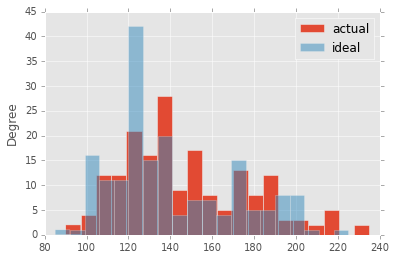

In [41]:
data['actual'].plot(kind="hist", legend=True, bins=20)
data['ideal'].plot(kind="hist", legend=True, bins=20, alpha=0.5)

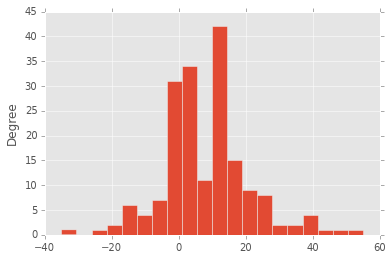

In [36]:
data['diff'].plot(kind="hist", bins=20)

In [48]:
data['sex'] = pd.Categorical(data['sex']).codes

In [58]:
#Male: 0
#Female: 1
data['sex'].value_counts()

0    119
1     63
dtype: int64

In [66]:
model = nb.GaussianNB()
y_pred = model.fit(data[['actual', 'ideal', 'diff']], data['sex']).predict(data[['actual', 'ideal', 'diff']])

In [78]:
mislabeled = sum(data['sex'] != y_pred)
print("Of the %s points in the data set, " %(len(data)) + 
      "%s were mislabeled" %mislabeled)

Of the 182 points in the data set, 14 were mislabeled


In [84]:
unknown1 = pd.Series({'actual': 145, 'ideal': 160, 'diff': -15})
model.predict(unknown1)[0]

1

In [85]:
unknown2 = pd.Series({'actual': 160, 'ideal': 145, 'diff': 15})
model.predict(unknown1)[0]

1